<a href="https://colab.research.google.com/github/sowbarnikachennai/sowbarnikachennai/blob/AIML/CarNumberPlateDetection_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opencv-python

# **Contours**

**Contour**

In [36]:
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np


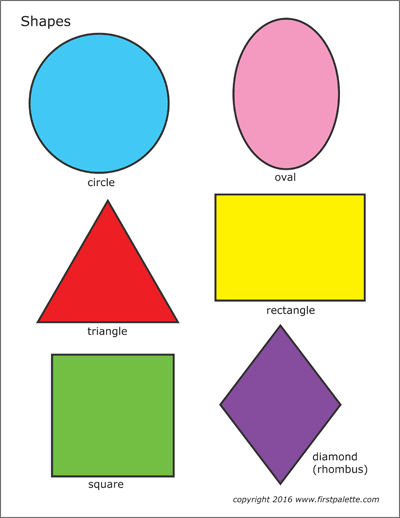

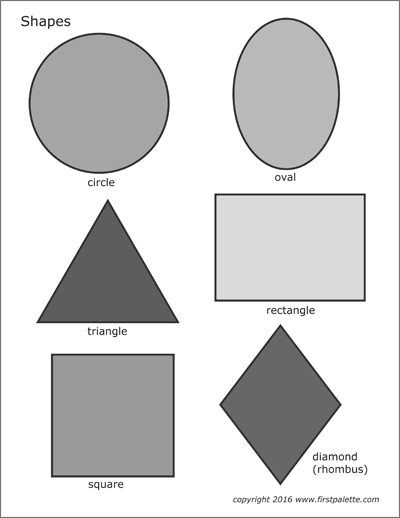

In [37]:
image = cv2.imread("shapes-basic-color.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2_imshow(gray)

**Internal Contour**

In [43]:
cnts,_ = cv2.findContours(gray.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
#print(cnts)
clone = image.copy()
cv2.drawContours(clone, cnts, -1,(0, 255, 0),5)
#cv2_imshow(clone)

IndexError: ignored

In [41]:
for i in cnts:
  mask = np.zeros(gray.size, dtype="uint8")
  cv2.drawContours(mask, [i], -1, 255, -1)
  cv2_imshow(cv2.bitwise_and(image, image, mask=mask))

error: ignored

# **Car Number Plate Detection**

In [55]:
image = cv2.imread("car.jpg")
image = imutils.resize(image,width=500)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [ ]:
cv2_imshow(image)

In [ ]:
cv2_imshow(gray)

In [ ]:
(T,threshInv) = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)

In [ ]:
cnts,_ = cv2.findContours(threshInv.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
clone = image.copy()
for i in cnts:
  x,y,w,h=cv2.boundingRect(i)
  print(x,y,w,h)

  if (w<100 and w>0 and h<100 and h>0):
    print(x,y,w,h)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2_imshow(image)